In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
titanic = pd.read_csv(r'E:\PYTHONCLASSJUPYTER\PrakashSenapati\titanic.csv')

In [3]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Performing Data Cleaning and Analysis:**

1. Understanding meaning of each column:
   - Data Dictionary:
   - Variable Description

- Survived - Survived (1) or died (0)
- Pclass - Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name - Passenger’s name
- Sex - Passenger’s sex
- Age - Passenger’s age
- SibSp - Number of siblings/spouses aboard
- Parch - Number of parents/children aboard (Some children travelled only with a nanny, therefore parch=0 for them)
- Ticket - Ticket number
- Fare - Fare
- Cabin - Cabin
- Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

2. Analysing which columns are completely useless in predicting the survival and deleting them
3. Note - Don't just delete the columns because you are not finding it useful, our focus is not on deleting the columns. Our focus is on analysing how each column is affecting the result or the prediction and in accordance with that deciding whether to keep the column or to delete the column or fill the null values of the column by some values and if yes, then what values.

In [6]:
del titanic['Name']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
del titanic["Ticket"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [8]:
del titanic["Fare"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


In [9]:
del titanic['Cabin']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [10]:
def getNumber(str):
    if str=='male':
        return 1
    else:
        return 2

In [11]:
titanic['Gender'] = titanic['Sex'].apply(getNumber)

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


In [13]:
del titanic['Sex']
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,2
2,3,1,3,26.0,0,0,S,2
3,4,1,1,35.0,1,0,S,2
4,5,0,3,35.0,0,0,S,1


In [14]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

**Fill the null values of the `Age` column**  
**Fill mean Survived age(mean age of the survived people) in the column where the person has survived and**  
**mean not Survived age (mean age of the people who have not survived) in the column where person has not survived**

In [15]:
SurvivedAgeMean = titanic[titanic.Survived==1].Age.mean()
SurvivedAgeMean

np.float64(28.343689655172415)

In [16]:
NotSurvivedAgeMean = titanic[titanic.Survived==0].Age.mean()
NotSurvivedAgeMean

np.float64(30.62617924528302)

Creating a new `age` column,  
filling values in it with a condition if goes True  
then given values (Here SurvivedAgeMean) is put in place of `Nan` values  
else nothing happens and simply the values are copied from the `Age` column of the dataset

In [17]:
titanic['age'] = np.where(
    pd.isnull(titanic.Age) & titanic['Survived']==1,
    SurvivedAgeMean,
    titanic['Age']
)

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [19]:
# Still 125 entries are null in 'age' column

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age            125
dtype: int64

In [26]:
# Wrong Code
# titanic.age.fillna(NotSurvivedAgeMean, inplace=True)

In [24]:
# titanic.fillna({'age':NotSurvivedAgeMean}, inplace=True)
titanic['age'] = titanic['age'].fillna(NotSurvivedAgeMean)

In [25]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age              0
dtype: int64

In [27]:
del titanic['Age']

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


We want to check if `Embarked` column is is important for analysis or not i.e.    
Whether survival of the person depends on the `Embarked` column or not

In [ ]:
# Finding the number of people who have survived 
# given that they have embarked or boarded from a particular port

In [ ]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]

print(survivedQ)
print(survivedC)
print(survivedS)

'''30
93
217'''

In [ ]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]

print(survivedQ)
print(survivedC)
print(survivedS)

'''47
75
427'''

- As there are significant changes in the survival rate based on which port the passengers aboard the ship.  
- We cannot delete the whole `embarked` column (It is useful). 
- Now the Embarked column has some null values in it and hence we can safely say that deleting some rows from total rows will not affect the result.  
- So rather than trying to fill those null values with some vales. We can simply remove them.

In [40]:
titanic.dropna(inplace=True)

In [41]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [42]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       0
Gender         0
age            0
dtype: int64

In [43]:
titanic.rename(columns={'age':'Age'}, inplace=True)

In [44]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [45]:
titanic.rename(columns={'Gender':'Sex'}, inplace=True)

In [46]:
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [48]:
def getEmb(str):
    if str=='S':
        return 1
    elif str=='Q':
        return 2
    else:
        return 3

In [49]:
titanic['Embark']=titanic['Embarked'].apply(getEmb)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age,Embark
0,1,0,3,1,0,S,1,22.0,1
1,2,1,1,1,0,C,2,38.0,3
2,3,1,3,0,0,S,2,26.0,1
3,4,1,1,1,0,S,2,35.0,1
4,5,0,3,0,0,S,1,35.0,1


In [50]:
del titanic['Embarked']
titanic.rename(columns={'Embark':'Embarked'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,Embarked
0,1,0,3,1,0,1,22.0,1
1,2,1,1,1,0,2,38.0,3
2,3,1,3,0,0,2,26.0,1
3,4,1,1,1,0,2,35.0,1
4,5,0,3,0,0,1,35.0,1


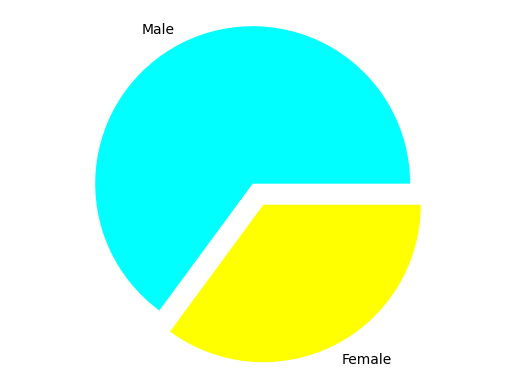

In [55]:
males = (titanic['Sex'] == 1).sum()
females = (titanic['Sex'] == 2).sum()
p = [males, females]
plt.pie(p,
       labels = ['Male', 'Female'],
       colors = ['cyan', 'yellow'],
       explode = (0.15, 0),
       startangle = 0
       )
plt.axis('equal')
plt.show()

In [56]:
p

[np.int64(577), np.int64(312)]

In [ ]:
# MaleS - Males Survived, MaleNS - Males Not Survived
# FemaleS - Females Survived, FemaleNS - Females Not Survived

MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
MaleNS=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
FemaleNS=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]

arry = [MaleS, MaleNS, FemaleS, FemaleNS]
print(arry)

# [109, 468, 231, 81]

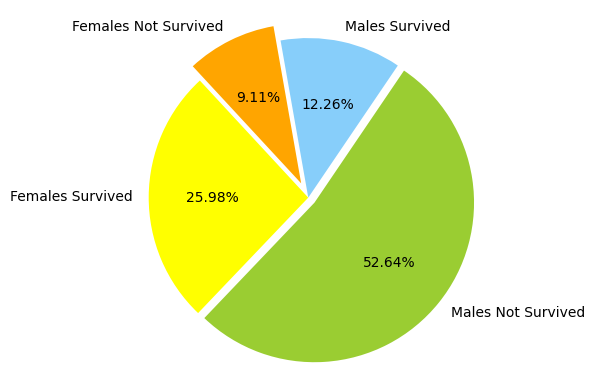

In [59]:
arry = [MaleS, MaleNS, FemaleS, FemaleNS]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=['Males Survived','Males Not Survived','Females Survived','Females Not Survived']
explode=[0,0.05,0,0.1]

plt.pie(arry,
        labels=labels,
        colors=colors,
        explode=explode,
        startangle=100,
        counterclock=False,
        autopct='%.2f%%'
       )

plt.axis('equal')
plt.show()